<a href="https://colab.research.google.com/github/krakowiakpawel9/ml_course/blob/master/unsupervised/04_anomaly_detection/03_isolation_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Wizualizacja danych](#2)
4. [Algorytm K-średnich](#3)
5. [Wizualizacja klastrów](#4)




### <a name='0'></a> Import bibliotek

In [0]:
!pip install -q pyod

In [0]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from pyod.utils.data import generate_data

sns.set()

In [0]:
data = generate_data(n_train=300, contamination=0.1, n_features=2, random_state=12, train_only=True)[0]

In [0]:
tmp = pd.DataFrame(data=data, columns=['x', 'y'])
px.scatter(tmp, x='x', y='y', width=700, color_continuous_midpoint=1)

In [0]:
from sklearn.ensemble import IsolationForest

In [0]:
outlier = IsolationForest(n_estimators=100)
outlier.fit(data)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [0]:
y_pred = outlier.predict(data)
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
tmp['outlier_flag'] = y_pred
px.scatter(tmp, x='x', y='y', color='outlier_flag', width=700, color_continuous_midpoint=1)

In [0]:
from mlxtend.plotting import plot_decision_regions

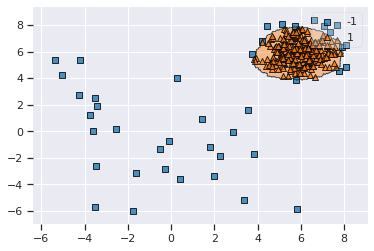

In [0]:
plot_decision_regions(data, y_pred, outlier)

In [0]:
tmp['value'] = outlier.decision_function(data)
tmp.head()

,x,y,outlier_flag,value
0,6.206380,5.618286,1,0.131698
1,5.756649,5.921924,1,0.125936
2,5.576329,5.792401,1,0.124990
3,5.304950,7.235000,1,0.056317
4,6.764064,5.965792,1,0.116984
